# [20250410] Pytorch 60 minutes blitz

In [53]:
import torch
import numpy as np

In [54]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)
print(f'x_data({x_data.shape}): {x_data}')

x_data(torch.Size([2, 2])): tensor([[1, 2],
        [3, 4]])


In [55]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
print(f'x_np({x_np.shape}): {x_np}')

x_np(torch.Size([2, 2])): tensor([[1, 2],
        [3, 4]])


In [56]:
x_ones = torch.ones_like(x_data)
print(f"Ones Tensor: \n {x_ones} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 



In [57]:
x_rand = torch.rand_like(x_data, dtype=torch.float)
print(f"Random Tensor: \n {x_rand} \n")

Random Tensor: 
 tensor([[0.0127, 0.0384],
        [0.8785, 0.1306]]) 



In [58]:
shape = (2, 3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.0878, 0.6996, 0.2674],
        [0.8391, 0.0840, 0.0186]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [59]:
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [60]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
tensor = tensor.to(device)
print(f"Device tensor is stored on: {tensor.device}")

Device tensor is stored on: cuda:0


In [61]:
tensor = torch.ones(4, 4)
tensor[:,1] = 0
print(f'tensor(shape: {tensor.shape}): \n{tensor}')

tensor(shape: torch.Size([4, 4])): 
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [62]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(f't1(shape: {t1.shape}): \n{t1}')

t1(shape: torch.Size([4, 12])): 
tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [63]:
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n") # element-wise

tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 



In [64]:
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n") # matrix mul

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 



In [65]:
# _ suffix are in-place. For example: x.copy_(y), x.t_(), will change x.

print(tensor, "\n")
tensor.add_(5)
print(tensor)
print(tensor.add(-5))
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


In [66]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [67]:
# A change in the tensor reflects in the NumPy array.
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [68]:
n = np.ones(5)
t = torch.from_numpy(n)

In [69]:
# Changes in the NumPy array reflects in the tensor.

np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


In [70]:
from torchvision.models import resnet18, ResNet18_Weights
model = resnet18(weights=ResNet18_Weights.DEFAULT)
data = torch.rand(1, 3, 64, 64)
lables = torch.rand(1, 1000)

In [71]:
prediction = model(data)
prediction.shape

torch.Size([1, 1000])

In [72]:
loss = (prediction - lables).sum()
loss.backward()

In [73]:
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

In [74]:
optim.step()

In [75]:
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

In [76]:
Q = 3*a**3 - b**2
Q_sum = (3*a**3 - b**2).sum()

In [77]:
Q_sum.backward()

In [78]:
a.grad

tensor([36., 81.])

In [79]:
a.grad.zero_()
b.grad.zero_()

tensor([0., 0.])

In [80]:
Q.backward(gradient=torch.tensor([1., 1.]))

In [81]:
print(a.grad) # Sum해도 어차피 무시되는 부분 동일..

tensor([36., 81.])


In [83]:
Q_sum.backward() # Dynamic graph

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [84]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [85]:
from torch import nn, optim

model = resnet18(weights=ResNet18_Weights.DEFAULT)

# Freeze all the parameters in the network
for param in model.parameters():
    param.requires_grad = False

In [86]:
model.fc

Linear(in_features=512, out_features=1000, bias=True)

In [87]:
model.fc = nn.Linear(in_features=512, out_features=10)

In [88]:
optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

In [89]:
import torch.nn.functional as F

In [90]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
    self.fc1 = nn.Linear(in_features=16 * 5 * 5, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=84)
    self.fc3 = nn.Linear(in_features=84, out_features=10)
  def forward(self, input):
    c1 = F.relu(self.conv1(input))
    s2 = F.max_pool2d(c1, kernel_size=(2, 2))
    c3 = F.relu(self.conv2(s2))
    s4 = F.max_pool2d(c3, kernel_size=(2, 2))
    s4 = torch.flatten(s4, start_dim=1)
    f5 = F.relu(self.fc1(s4))
    f6 = F.relu(self.fc2(f5))
    output = self.fc3(f6)
    return output

net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [91]:
params = list(net.parameters()) # 10 -> weights(5) + bias(5)
print(len(params))
print(params[0].size())

10
torch.Size([6, 3, 5, 5])


In [92]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

RuntimeError: Given groups=1, weight of size [6, 3, 5, 5], expected input[1, 1, 32, 32] to have 3 channels, but got 1 channels instead

In [93]:
net.zero_grad()
out.backward(torch.randn(1, 10))

NameError: name 'out' is not defined

In [94]:
output = net(input)
target = torch.randn(10)
target = target.view(1, -1)
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

RuntimeError: Given groups=1, weight of size [6, 3, 5, 5], expected input[1, 1, 32, 32] to have 3 channels, but got 1 channels instead

In [95]:
print(loss.grad_fn)
print(loss.grad_fn.next_functions[0][0])
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])

In [96]:
net.zero_grad()

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
None


RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [97]:
learning_rate = 1e-2
for f in net.parameters():
  print(f"f's type: {type(f)}, f.data's type: {type(f.data)}")
  f.data.sub_(f.grad.data * learning_rate)

f's type: <class 'torch.nn.parameter.Parameter'>, f.data's type: <class 'torch.Tensor'>


AttributeError: 'NoneType' object has no attribute 'data'

In [98]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr=1e-2)

optimizer.zero_grad()
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()

RuntimeError: Given groups=1, weight of size [6, 3, 5, 5], expected input[1, 1, 32, 32] to have 3 channels, but got 1 channels instead

In [99]:
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

In [100]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

trainloader: <class 'torch.utils.data.dataloader.DataLoader'>
iter(trainloader): <class 'torch.utils.data.dataloader._MultiProcessingDataLoaderIter'>
[imshow] img: (<class 'torch.Tensor'>, torch.Size([3, 36, 138]))
classes: deer  deer  deer  dog  


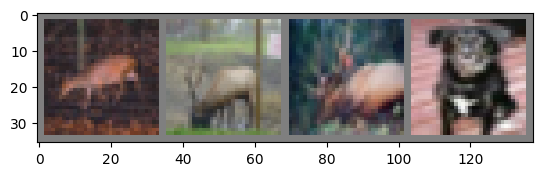

In [101]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
  print(f'[imshow] img: {type(img), img.shape}')
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))

print(f'trainloader: {type(trainloader)}')
dataiter = iter(trainloader)
print(f'iter(trainloader): {type(dataiter)}')
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print('classes:', end=' ')
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [102]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=1e-3, momentum=0.9)

In [103]:
for epoch in range(2):
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    optimizer.zero_grad()

    outputs = net(inputs)
    # print(f'outputs: {outputs.shape}, labels: {labels.shape}')
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i % 2000 == 1999:
      print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
      running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.197
[1,  4000] loss: 1.901
[1,  6000] loss: 1.706
[1,  8000] loss: 1.594
[1, 10000] loss: 1.548
[1, 12000] loss: 1.467
[2,  2000] loss: 1.388
[2,  4000] loss: 1.360
[2,  6000] loss: 1.347
[2,  8000] loss: 1.288
[2, 10000] loss: 1.301
[2, 12000] loss: 1.280
Finished Training


[imshow] img: (<class 'torch.Tensor'>, torch.Size([3, 36, 138]))
GroundTruth:  cat   ship  ship  plane


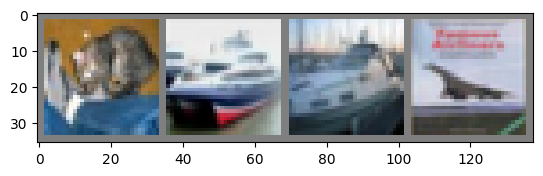

In [104]:
dataiter = iter(testloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [105]:
outputs = net(images)

In [108]:
_, predicted = torch.max(outputs, 1)

In [113]:
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))

Predicted:  cat   car   car   plane


In [114]:
correct = 0
total = 0

with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 54 %


In [115]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs = net(images)
    _, predictions = torch.max(outputs, 1)

    for label, prediction in zip(labels, predictions):
      if label == prediction:
        correct_pred[classes[label]] += 1
      total_pred[classes[label]] += 1

for classname, correct_count in correct_pred.items():
  accuracy = 100 * float(correct_count) / total_pred[classname]
  print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 70.3 %
Accuracy for class: car   is 79.2 %
Accuracy for class: bird  is 40.0 %
Accuracy for class: cat   is 32.3 %
Accuracy for class: deer  is 30.8 %
Accuracy for class: dog   is 56.1 %
Accuracy for class: frog  is 69.3 %
Accuracy for class: horse is 62.8 %
Accuracy for class: ship  is 47.5 %
Accuracy for class: truck is 61.6 %
